# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [114]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import openweathermapy.core as owm 
from scipy.stats import linregress
from pprint import pprint 
from urllib.request import urlopen 
import json as simplejson
import json

from sklearn import datasets
from scipy.stats import linregress


# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

600


In [3]:
#configurations information 
url = "http://api.openweathermap.org/data/2.5/weather?"

#Setting the units to imperieal format
units = "imperial"

#Building the query url 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Grabbing the weather data 
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

#printing out the json 
print(json.dumps(weather_json, indent=4))
            

{
    "coord": {
        "lon": 173.78,
        "lat": -35.1
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 64,
        "feels_like": 64.44,
        "temp_min": 64,
        "temp_max": 64,
        "pressure": 1020,
        "humidity": 96
    },
    "visibility": 10000,
    "wind": {
        "speed": 7,
        "deg": 345,
        "gust": 13
    },
    "clouds": {
        "all": 88
    },
    "dt": 1604084919,
    "sys": {
        "type": 3,
        "id": 2012217,
        "country": "NZ",
        "sunrise": 1604078610,
        "sunset": 1604127200
    },
    "timezone": 46800,
    "id": 2189343,
    "name": "Kaeo",
    "cod": 200
}


In [4]:

print(requests.get(query_url + city))

<Response [200]>


In [5]:
#empty lists that will hold my city data information 

#city name
city_name = []

#latitude
lat_data = [] 

#longtitude
long_data = [] 

#temperature
max_temp = [] 

#humidity
humidity = [] 

#cloudiness
cloud = [] 

#windiness
wind = []

#country 
country = [] 

#date
date = [] 



# Create a processing record counter 
record_counter = 1

#Printing an alert that notifies the user that we are starting the api log requests 

print(f"BEGINNING OF LOG STATEMENT")
print(f"--------------------------")


#Looping through the list of cities and appending them to the list created above 
for city in cities:


    # exception handling 
    try:
        #Building a query url based on current element units 
        response = requests.get(query_url + city).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_name.append(response["name"])
        lat_data.append(response["coord"]["lat"])
        long_data.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_counter = response["name"]
        
        print(f"Processing record {record_counter}|{city_counter}")
        #increaseing the record counter by 1 for each iteration
        record_counter += 1

    # If an error is experienced, skip the city
    except:
        print("City not in list..")
    continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




BEGINNING OF LOG STATEMENT
--------------------------
Processing record 1|Hobyo
Processing record 2|Tasiilaq
Processing record 3|Rikitea
Processing record 4|Whakatane
City not in list..
Processing record 5|Cape Town
City not in list..
Processing record 6|Bhongīr
Processing record 7|Comodoro Rivadavia
Processing record 8|Arrondissement de Bernay
Processing record 9|Ulcinj
Processing record 10|Jamestown
Processing record 11|Kasama
Processing record 12|Hailar
Processing record 13|Denpasar
City not in list..
Processing record 14|Tuktoyaktuk
Processing record 15|Cidreira
Processing record 16|Shache
Processing record 17|Hobart
Processing record 18|Narsaq
Processing record 19|Belmonte
Processing record 20|Marsá Maţrūḩ
Processing record 21|Mitsamiouli
Processing record 22|Bambous Virieux
Processing record 23|Kapaa
Processing record 24|Clyde River
City not in list..
Processing record 25|Port Alfred
Processing record 26|Qaanaaq
Processing record 27|Tarko-Sale
Processing record 28|Greymouth
Proce

Processing record 249|Caluquembe
Processing record 250|Boshan
City not in list..
Processing record 251|Conakry
Processing record 252|Norman Wells
Processing record 253|Cayenne
Processing record 254|Mattru
Processing record 255|Jinchang
Processing record 256|Pangnirtung
Processing record 257|Sinazongwe
City not in list..
Processing record 258|Maragogi
Processing record 259|Abashiri
Processing record 260|Mount Isa
Processing record 261|Varhaug
Processing record 262|Tari
Processing record 263|Stephenville
Processing record 264|Rājula
Processing record 265|Hobbs
Processing record 266|Honiara
Processing record 267|Monrovia
Processing record 268|Evensk
Processing record 269|Atbasar
City not in list..
Processing record 270|Karratha
Processing record 271|Leshukonskoye
Processing record 272|Bethel
Processing record 273|Los Llanos de Aridane
Processing record 274|Acajutla
Processing record 275|Sisimiut
Processing record 276|Coihueco
Processing record 277|Chongwe
Processing record 278|Bacolod Cit

Processing record 497|Chumikan
Processing record 498|Saquena
Processing record 499|Lamar
Processing record 500|Folldal
Processing record 501|Centralia
Processing record 502|Katangli
Processing record 503|Zopilotepe
Processing record 504|Skibbereen
Processing record 505|Arona
Processing record 506|Chiredzi
Processing record 507|Vila do Maio
Processing record 508|Vanimo
Processing record 509|Soyo
Processing record 510|Tyukhtet
Processing record 511|Thunder Bay
City not in list..
Processing record 512|Venosa
Processing record 513|Marzuq
Processing record 514|Ouésso
Processing record 515|Klyuchi
Processing record 516|Roald
Processing record 517|Kununurra
Processing record 518|Alexandria
Processing record 519|West Richland
Processing record 520|Saint-Augustin
Processing record 521|Lamu
Processing record 522|Lac du Bonnet
Processing record 523|Petroşani
Processing record 524|Koslan
Processing record 525|Savannah Bight
Processing record 526|Nuevo Ideal
Processing record 527|Santa Fe
Processin

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#empty lists that will hold my city data information 

#city name
city_name = []

#latitude
lat_data = [] 

#longtitude
long_data = [] 

#temperature
max_temp = [] 

#humidity
humidity = [] 

#cloudiness
cloud = [] 

#windiness
wind = []

#country 
country = [] 

#date
date = [] 



# Create a processing record counter 
record_counter = 1

#Printing an alert that notifies the user that we are starting the api log requests 

print(f"BEGINNING OF LOG STATEMENT")
print(f"--------------------------")


#Looping through the list of cities and appending them to the list created above 
for city in cities:


    # exception handling 
    try:
        #Building a query url based on current element units 
        response = requests.get(query_url + city).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_name.append(response["name"])
        lat_data.append(response["coord"]["lat"])
        long_data.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_counter = response["name"]
        
        print(f"Processing record {record_counter}|{city_counter}")
        #increaseing the record counter by 1 for each iteration
        record_counter += 1

    # If an error is experienced, skip the city
    except:
        print("City not in list..")
    continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
#Creating the data frame with the appended information above 
city_df = pd.DataFrame({
    'City':city_name,
    'Latitude':lat_data,
    'Longtitude':long_data, 
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloud,
    'Wind Speed':wind,
    'Country':country,
    'Date':date
})

#finalizing the data frame 
city_df = pd.DataFrame(city_df)

#exporting the frame to a csv 
city_df.to_csv('City_Data.csv',index=False)

city_df

,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobyo,5.35,48.53,81.21,78,46,12.95,SO,1604084870
1,Tasiilaq,65.61,-37.64,32.00,97,75,3.36,GL,1604084913
2,Rikitea,-23.12,-134.97,75.63,69,0,8.19,PF,1604085065
3,Whakatane,-37.96,176.99,63.00,83,100,1.99,NZ,1604085066
4,Cape Town,-33.93,18.42,60.01,62,0,23.04,ZA,1604084955
...,...,...,...,...,...,...,...,...,...
551,Bhubaneswar,20.23,85.83,73.40,78,20,5.86,IN,1604085172
552,Moose Factory,51.26,-80.61,28.40,58,1,10.29,CA,1604084957
553,Venice,27.10,-82.45,79.00,65,1,14.99,US,1604085066
554,Ossora,59.24,163.07,30.47,92,0,2.06,RU,1604085173


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
#There are no cities with the humidity over 100% in this data set 
city_df.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.074568,16.846583,58.835827,72.519784,53.091727,7.867806,1.604085e+09
std,33.222141,89.844528,22.255561,20.325849,41.178240,5.708067,1.438467e+02
min,-54.800000,-175.200000,-15.360000,11.000000,0.000000,0.270000,1.604084e+09
25%,-8.267500,-63.665000,43.870000,62.000000,1.000000,3.590000,1.604085e+09
50%,25.455000,19.225000,64.010000,77.000000,64.000000,6.890000,1.604085e+09
75%,48.710000,88.827500,77.000000,88.000000,97.250000,10.290000,1.604085e+09
max,78.220000,179.320000,99.300000,100.000000,100.000000,33.330000,1.604085e+09


In [106]:
#double checked to see if there were any cities above 100% humidity

#from the above description we see that the max humidity rests at 100% on the dot 
city_df.loc[city_df['Humidity'] > 100]



,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [107]:
# Get the indices of cities that have humidity over 100%.


In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph tell us that the closer we get a latitude value of 0 to 20 degrees, the more likely the temperature is to rise. 
It is safe to say that location does play a major factor in temperature. 

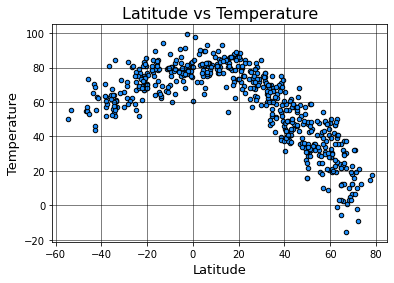

In [116]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Temperature',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Max Temp',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Temperature',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Latitude vs. Humidity Plot

The following is the same approach but for humidity. The graph below shows a large cluster of marker at the latitude 
value of 60 degrees. This tells us that there is a high correlation of humidity and those cities located in the 60 degree 
latititude of the world. 

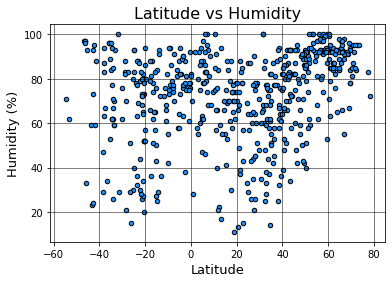

In [117]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Humidity',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Humidity',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Humidity (%)',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Latitude vs. Cloudiness Plot

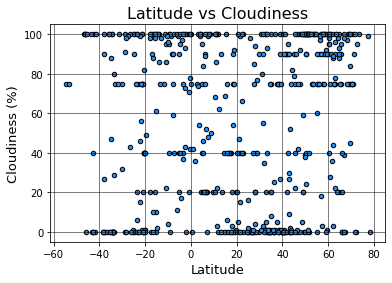

In [101]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Cloudiness',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Cloudiness',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Cloudiness (%)',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Latitude vs. Wind Speed Plot

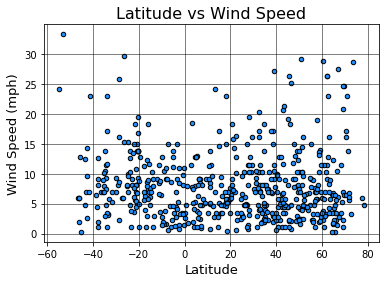

In [108]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Wind Speed',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Wind Speed',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Wind Speed (mph)',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.79218


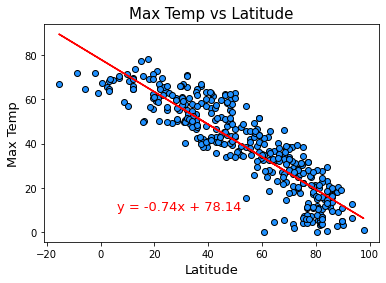

In [171]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

x_values = northern_hem['Max Temp']

y_values = northern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(6,10),fontsize=13,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Max Temp',fontsize=13)


plt.title('Max Temp vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46091


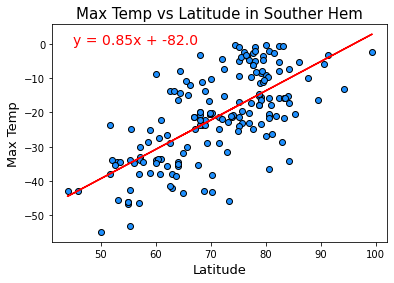

In [230]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

x_values = southern_hem['Max Temp']

y_values = southern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values1, "r-")

plt.annotate(line_eq,(45,0),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Max Temp',fontsize=13)


plt.title('Max Temp vs Latitude in Souther Hem',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13848


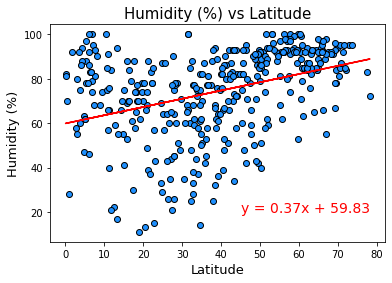

In [233]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

x_values = northern_hem['Latitude']

y_values = northern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(45,20),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Humidity (%)',fontsize=13)


plt.title('Humidity (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00467


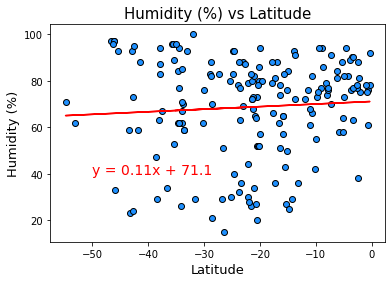

In [212]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

x_values = southern_hem['Latitude']

y_values = southern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(-50,40),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Humidity (%)',fontsize=13)


plt.title('Humidity (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04845


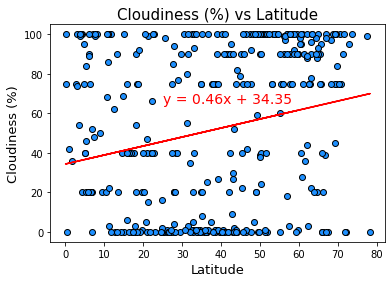

In [204]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

y_values = northern_hem['Cloudiness']

x_values = northern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(25,65),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Cloudiness (%)',fontsize=13)


plt.title('Cloudiness (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03192


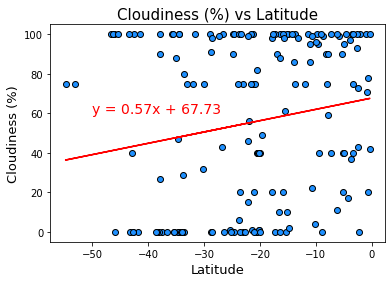

In [211]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

south_cloud= southern_hem['Cloudiness']

cloud_lat = southern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(cloud_lat,south_cloud)

regress_values = cloud_lat * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(cloud_lat, south_cloud, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(-50,60),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Cloudiness (%)',fontsize=13)


plt.title('Cloudiness (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00767


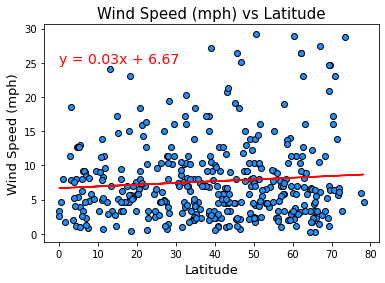

In [206]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

y_values = northern_hem['Wind Speed']

x_values = northern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(0,25),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Wind Speed (mph)',fontsize=13)


plt.title('Wind Speed (mph) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05064


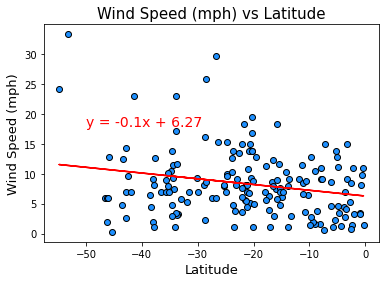

In [210]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

y_values = southern_hem['Wind Speed']

x_values = southern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(-50,18),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Wind Speed (mph)',fontsize=13)


plt.title('Wind Speed (mph) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()